<a href="https://colab.research.google.com/github/Amitgm/Deep-Learning-for-sentiment-analysis/blob/main/2D_CNN_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Flatten,Dropout
from keras.layers import Activation,Embedding,TimeDistributed,LSTM,GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.convolutional import *
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import text
from keras.preprocessing import sequence
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
nltk.download('stopwords')
nltk.download('punkt')
from keras.applications.vgg16 import VGG16
from PIL import Image
from numba import jit, cuda
import keras.models

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
img1=np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img2=np.array([0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img3=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img4=np.array([0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img5=np.array([0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img6=np.array([0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img7=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img8=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img9=np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0])
img10=np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img11=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img12=np.array([0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img13=np.array([0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img14=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img15=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img16=np.array([0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img17=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img18=np.array([0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img19=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img20=np.array([0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img21=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img22=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img23=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img24=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img25=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img26=np.array([0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img27=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [ ]:
img2=img2.reshape(10,6)
img1=img1.reshape(10,6)
img3=img3.reshape(10,6)
img4=img4.reshape(10,6)
img5=img5.reshape(10,6)
img6=img6.reshape(10,6)
img7=img7.reshape(10,6)
img8=img8.reshape(10,6)
img9=img9.reshape(10,6)
img10=img10.reshape(10,6)
img11=img11.reshape(10,6)
img12=img12.reshape(10,6)
img13=img13.reshape(10,6)
img14=img14.reshape(10,6)
img15=img15.reshape(10,6)
img16=img16.reshape(10,6)
img17=img17.reshape(10,6)
img18=img18.reshape(10,6)
img19=img19.reshape(10,6)
img20=img20.reshape(10,6)
img21=img21.reshape(10,6)
img22=img22.reshape(10,6)
img23=img23.reshape(10,6)
img24=img24.reshape(10,6)
img25=img25.reshape(10,6)
img26=img26.reshape(10,6)
img27=img27.reshape(10,6)

In [ ]:
dict1={'A':img1,'B':img2,'C':img3,'D':img4,'E':img5,'F':img6,'G':img7,'H':img8,'I':img9,'J':img10,'K':img11,'L':img12,'M':img13,'N':img14,'O':img15,'P':img16,'Q':img17,'R':img18,'S':img19,'T':img20,'U':img21,'V':img22,'W':img23,'X':img24,'Y':img25,'Z':img26,' ':img27}

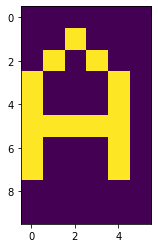

In [ ]:
plt.imshow(img1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/My Drive/Tweets.csv')

In [ ]:
dataset=dataset[dataset['airline_sentiment']!='neutral']

In [ ]:
dataset=dataset.reset_index()
dataset=dataset[['text','airline_sentiment']]

In [ ]:
dataset_labels=pd.get_dummies(dataset.airline_sentiment)

In [ ]:
dataset_labels

In [ ]:
dataset=dataset['text']

In [ ]:
dataset

0        @VirginAmerica plus you've added commercials t...
1        @VirginAmerica it's really aggressive to blast...
2        @VirginAmerica and it's a really big bad thing...
3        @VirginAmerica seriously would pay $30 a fligh...
4        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
11536    @AmericanAir my flight was Cancelled Flightled...
11537           @AmericanAir right on cue with the delays👌
11538    @AmericanAir thank you we got on a different f...
11539    @AmericanAir leaving over 20 minutes Late Flig...
11540    @AmericanAir you have my money, you change my ...
Name: text, Length: 11541, dtype: object

In [ ]:
def process(data): 
 text_dataframe=pd.DataFrame()
 text_list=[]
 word_list=[]  
 stop_words=set(stopwords.words("english"))
 for i in tqdm(range(0,len(data))):
    text1=re.sub("@[A-Za-z0-9]+"," ",data[i])
    text1=re.sub("#[A-Za-z0-9]+"," ",text1)
    text1=re.sub("http\S+"," ",text1)
    text1=re.sub("[^A-Za-z]+"," ",text1)
    words=word_tokenize(text1)
    for w in words:
     if w not in stop_words:
           word_list.append(w)
    text1=TreebankWordDetokenizer().detokenize(word_list)
    word_list=[]
    text1=text1.upper()
    text_list.append(text1)    

      


 text_dataframe=text_dataframe.append(text_list)

 return text_dataframe
      


In [ ]:
procs_dataset=process(dataset)

100%|██████████| 11541/11541 [00:03<00:00, 3220.81it/s]


In [ ]:
pro=procs_dataset[0]

In [ ]:
vocab_size=1500
tokenizer=text.Tokenizer(num_words=vocab_size)

In [ ]:
tokenizer.fit_on_texts(pro)

In [ ]:
sequences=tokenizer.texts_to_sequences(pro)

In [ ]:
word=tokenizer.sequences_to_texts(sequences)

In [ ]:
list_word=[]
for w in word:
   list_word.append(w.upper())

In [ ]:
procs_dataset=pd.DataFrame(list_word)

In [ ]:
joined_data=pd.concat([procs_dataset,dataset_labels],axis=1)

In [ ]:
joined_data.replace('',np.nan,inplace=True)
joined_data.dropna(axis=0,how='any',inplace=True)

In [ ]:
dataset=joined_data[0]

In [ ]:
dataset=pd.DataFrame(dataset)

In [ ]:
dataset_labels=joined_data.iloc[:,1:4]

In [ ]:
dataset

,0
0,PLUS ADDED EXPERIENCE
1,REALLY ENTERTAINMENT AMP LITTLE
2,REALLY BIG BAD THING
3,SERIOUSLY WOULD PAY FLIGHT SEATS REALLY BAD TH...
4,YES NEARLY EVERY TIME I FLY GO AWAY
...,...
11536,FLIGHT CANCELLED FLIGHTLED LEAVING TOMORROW MO...
11537,RIGHT DELAYS
11538,THANK GOT DIFFERENT FLIGHT CHICAGO
11539,LEAVING MINUTES LATE FLIGHT NO COMMUNICATION M...


In [ ]:
data_train,data_test,label_train,label_test=train_test_split(dataset,dataset_labels,test_size=0.2)

In [ ]:
def convert_to_images(dataframe):
 image_dataset=[]
 for j in (dataframe[0]):
  images=[]
  for ch in (j):
    img=dict1[ch]
    images.append(img)
    
  image_list=np.concatenate(images,axis=1)
  image_dataset.append(image_list)
    
 return image_dataset
    
    
    
    
    
df=convert_to_images(data_train)

In [ ]:
data_train[0]

6699    BUSY DUE STORM CUSTOMER SERVICE ALWAYS POINT M...
3254    AGENTS SAID WOULD REFUNDED AGENTS SAID UNITED ...
7677    BEEN HOLD HOURS SYSTEM HUNG TWICE HOUR HOLDING...
5550      I WAY FLIGHT TREATED HRS BOARD PLANE INFO GIVEN
4912    I LOVE APPRECIATE FACT GUYS CANCELLED FLIGHT F...
                              ...                        
2438                                              ANOTHER
4194    BAD ENOUGH SEAT ASSIGNED SEATING EXIT SEAT FLI...
1540                IF UNITED BAGGAGE GET AIRPORT COUNTRY
3027                          ND LATE FLIGHT FLIGHT TODAY
1648                    I FIRST TIME PRETTY PLACE KNOWING
Name: 0, Length: 9200, dtype: object

In [ ]:
df_test=convert_to_images(data_test)

In [ ]:
list2=[]
for i ,j in enumerate(data_train[0]):
    a=180-len(j)
    print(i)
    print(len(j))
    print(a)
    for k in range(0,a):
        list2.append(dict1[' '])
    list2=np.concatenate(list2,axis=1)
    df[i]=np.concatenate((df[i],list2),axis=1)
    list2=[]

In [ ]:
list3=[]
for i ,j in enumerate(data_test[0]):
    a=180-len(j)
    print(i)
    print(len(j))
    print(a)
    for k in range(0,a):
        list3.append(dict1[' '])
    list3=np.concatenate(list3,axis=1)
    df_test[i]=np.concatenate((df_test[i],list3),axis=1)
    list3=[]

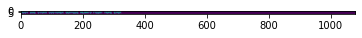

In [ ]:
plt.imshow(df[0])

In [ ]:
df.shape

AttributeError: ignored

In [ ]:
dfs=df.reshape(-1, 10, 1080,1)

AttributeError: ignored

In [ ]:
dfs.shape

(9200, 10, 1080, 1)

In [ ]:
model=Sequential([Conv2D(16,kernel_size=3,activation='relu',input_shape=(10,1080,1)),
                  Conv2D(32,kernel_size=3,activation='relu'),
                  Conv2D(64,kernel_size=3,activation='relu'),
                  Flatten(),
                  Dense(64,activation='relu'),
                  Dense(2,activation='softmax')])


the accuracy slowly increases


In [ ]:
model2=Sequential([Conv2D(64,kernel_size=3,activation='relu',input_shape=(10,1080,1)),
                  Conv2D(64,kernel_size=3,activation='relu'),
                  Conv2D(64,kernel_size=3,activation='relu'),
                  Flatten(),
                  Dense(64,activation='relu'),
                  Dense(2,activation='softmax')])

In [ ]:
model8=Sequential()
model8.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(10,1080,1))),
model8.add(Conv2D(32,kernel_size=3,activation='relu')),
model8.add(Conv2D(32,kernel_size=3,activation='relu')),
model8.add(Flatten()),
model8.add(Dense(512,activation='relu')),
model8.add(Dense(2,activation='softmax'))


In [ ]:
model4=Sequential()
model4.add(Conv2D(64,kernel_size=5,activation='relu',padding='same',input_shape=(10,1080,1))),
model4.add(Conv2D(32,kernel_size=3,activation='relu')),
model4.add(Flatten()),
model4.add(Dense(64,activation='relu')),
model4.add(Dense(2,activation='softmax'))

In [ ]:
model7=Sequential()
model7.add(Conv2D(32,kernel_size=(3,10),padding='same',activation='relu',input_shape=(10,1080,1))),
model7.add(Conv2D(32,kernel_size=(3,10),activation='relu',padding='same')),
model7.add(Conv2D(32,kernel_size=(1,10),activation='relu')),
model7.add(MaxPooling2D(pool_size=(2, 2))),
model7.add(Conv2D(64,kernel_size=(3,10),padding='same')),
model7.add(keras.layers.BatchNormalization(axis=-1)),
model7.add(keras.layers.Activation('relu')),
model7.add(Conv2D(64,kernel_size=(3,10))),
model7.add(keras.layers.BatchNormalization(axis=-1)),
model7.add(keras.layers.Activation('relu')),
model7.add(keras.layers.MaxPooling2D(pool_size=(2, 2))),   
model7.add(Flatten()),
model7.add(Dense(512)),
model7.add(keras.layers.BatchNormalization(axis=-1)),
model7.add(keras.layers.Activation('relu')),
model7.add(Dense(2,activation='softmax'))

In [ ]:
model9=Sequential()
model9.add(Conv2D(32,kernel_size=(3,3),padding='same',input_shape=(10,1080,1))),
model9.add(keras.layers.Activation('relu')),
model9.add(Conv2D(64,kernel_size=(3,3),padding='same')),
model9.add(keras.layers.Activation('relu')),
model9.add(Conv2D(128,kernel_size=(1,1))),
model9.add(keras.layers.Activation('relu')),
model9.add(keras.layers.MaxPooling2D(pool_size=(2, 2))),
model9.add(Conv2D(64,kernel_size=(3,3),padding='same')),
model9.add(keras.layers.BatchNormalization(axis=-1)),
model9.add(keras.layers.Activation('relu')),
model9.add(Conv2D(32,kernel_size=(3,3))),
model9.add(keras.layers.BatchNormalization(axis=-1)),
model9.add(keras.layers.Activation('relu')),
model9.add(keras.layers.MaxPooling2D(pool_size=(2, 2))),   
model9.add(Flatten()),
model9.add(Dense(512)),
model9.add(keras.layers.BatchNormalization(axis=-1)),
model9.add(keras.layers.Activation('relu')),                
model9.add(Dense(2,activation='softmax'))

In [ ]:
model8.compile(Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model8.fit(dfs,label_train,validation_split=0.2,batch_size=100,epochs=10)

Train on 7360 samples, validate on 1840 samples
Epoch 1/10
7360/7360 [==============================] - 17s 2ms/step - loss: 3.1647 - accuracy: 0.7861 - val_loss: 3.2508 - val_accuracy: 0.7880
Epoch 2/10
7360/7360 [==============================] - 17s 2ms/step - loss: 3.1678 - accuracy: 0.7940 - val_loss: 3.2508 - val_accuracy: 0.7880
Epoch 3/10
7360/7360 [==============================] - 17s 2ms/step - loss: 3.1678 - accuracy: 0.7940 - val_loss: 3.2508 - val_accuracy: 0.7880
Epoch 4/10
4800/7360 [==================>...........] - ETA: 5s - loss: 3.1687 - accuracy: 0.7940

KeyboardInterrupt: ignored

In [ ]:
dfs1=np.array(df_test)

In [ ]:
dfs1=dfs1.reshape(-1, 10, 1080,1)

In [ ]:
dfs1.shape

(2301, 10, 1080, 1)

In [ ]:
predictions=model7.predict(dfs1)

In [ ]:
predictions

array([[0.98062485, 0.01937513],
       [0.99379176, 0.00620829],
       [0.8902146 , 0.10978539],
       ...,
       [0.99437124, 0.00562884],
       [0.07163121, 0.9283688 ],
       [0.4389995 , 0.5610005 ]], dtype=float32)

In [ ]:
results=model7.evaluate(dfs1,label_test)
# evaluation

2301/2301 [==============================] - 5s 2ms/step


In [ ]:
results

[0.3182237349945998, 0.8770099878311157]

In [ ]:
  from sklearn.metrics import confusion_matrix
  import itertools

In [ ]:
label_test_array=np.array(label_test)

In [ ]:
prediction_list=[]
for i in predictions:
    prediction_list.append(np.argmax(i))
    #print(i)
    

In [ ]:
label_test_array_list=[]
for j in label_test_array:
    label_test_array_list.append(np.argmax(j))

In [ ]:
cm = confusion_matrix(label_test_array_list,prediction_list)

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion_matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('normalized confusion matrix')
    else:
        print('confusion matrix,without normalization')
    print(cm)
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j], 
                 horizontalalignment="center",
                 color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('true_label')
    plt.xlabel('predicted_label')

confusion matrix,without normalization
[[1760   95]
 [ 188  258]]


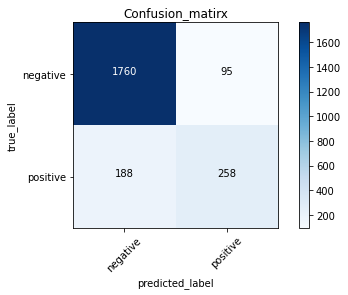

In [ ]:
cm_plot_labels=['negative','positive']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matirx')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_test_array_list,prediction_list))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1855
           1       0.73      0.58      0.65       446

    accuracy                           0.88      2301
   macro avg       0.82      0.76      0.79      2301
weighted avg       0.87      0.88      0.87      2301

